In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [8]:
crimes = pd.read_csv('crimes.csv')
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


1. Which hour has the highest frequency of crimes? Store as an integer variable called "peak_crime_hour".

In [12]:
crimes['HOUR OCC'] = crimes['TIME OCC'].astype(str).str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,63
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,90


In [62]:
peak_crime_hour = crimes['HOUR OCC'].value_counts().reset_index().sort_index(ascending = True)
peak_crime_hour.head()

,HOUR OCC,count
0,12,14219
1,20,11824
2,10,11310
3,15,10198
4,18,10144


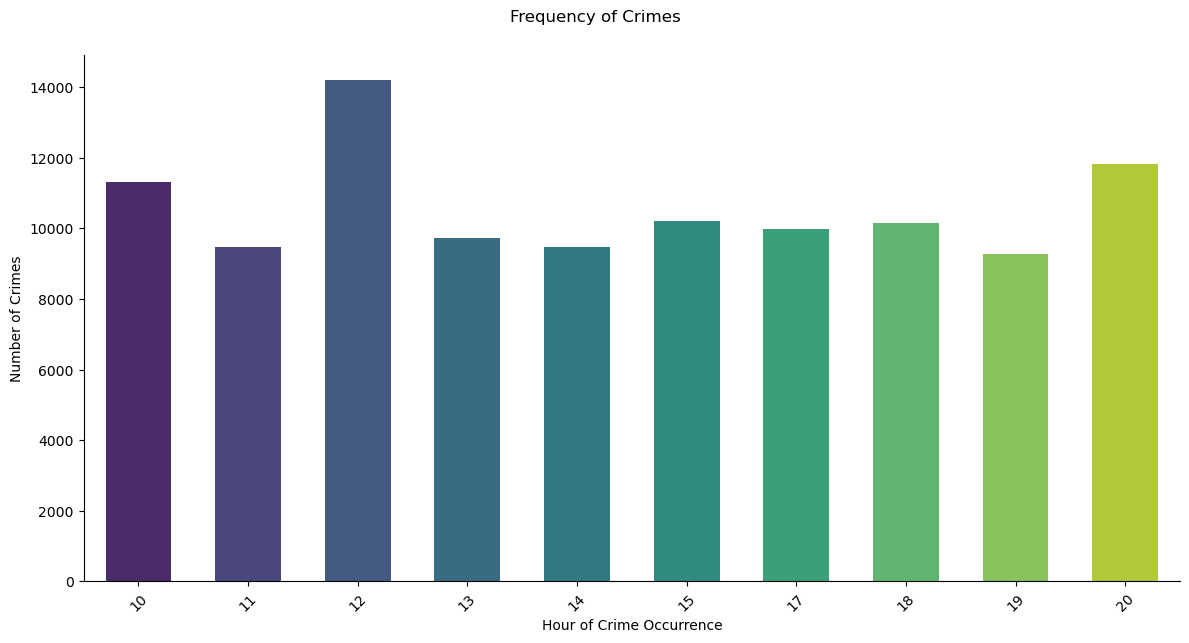

In [ ]:
top_10_peak_crime = peak_crime_hour.head(10)


g= sns.catplot(data=top_10_peak_crime, x='HOUR OCC', y='count', palette='viridis', kind = 'bar', height=6, width=.6,  aspect=2)


g.set_axis_labels('Hour of Crime Occurrence', 'Number of Crimes')
g.set_xticklabels(rotation=45)
g.fig.suptitle('Frequency of Crimes', y=1.05)  # y adjusts spacing from plot

plt.show()


2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called "peak_night_crime_location"

In [70]:
night_crimes = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]
night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,1
30,221314362,2022-07-11,2020-04-07,1,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,1
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,1,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,1
39,220710510,2022-06-16,2020-07-01,1,Wilshire,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",19,X,X,NaN,Invest Cont,6100 WILSHIRE BL,1


In [102]:
night_location = night_crimes[['HOUR OCC', 'AREA NAME']]
peak_night_crime_location = night_location['AREA NAME'].value_counts().reset_index()
peak_night_crime_location.iloc[0]["AREA NAME"]

'Central'